In [1]:
#Importing all the required libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
#We have taken cities as the variable for different states
cities = ['hyderabad','mumbai','bangalore','delhi-ncr','jaipur',
          'ahmedabad','gurgaon','chennai','pune','kolkata',
          'lucknow','agra','surat','vadodara','kanpur',
          'chandigarh','dehradun','rajkot','bhubaneswar','ludhiana','thiruvananthapuram']

# These are the variables used to store data of each datatype respectively
price = []
brand = []
driven_kms = []
year = []
city = []
fuel = []
transmission = []
model  = []
name = []

In [3]:
# Iterate through a range of 21, assuming 'cities' is a list of URLs for different cities
for i in range(21):
    
    # Create URL based on the city index
    url = f"https://www.cardekho.com/used-cars+in+{cities[i]}" 
    
    #Send a GET request to the URL with a specified User-Agent in headers
    page = requests.get(url, headers = {'User-Agent':'Mozilla/5.0'}, verify=False)
    
    #Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser') 
    
    #Iterate through all 'div' elements with class 'NewUcExCard posR'
    for j in soup.find_all('div', class_='NewUcExCard posR'):
        
        #Extract price information
        a = j.find('div', class_='Price hover') 
        if a.text: 
            price.append(a.text)
        else:
            price.append(np.nan)
            
        # Extract brand information with special cases for 'Land Rover' and 'Mercedes-Benz'
        brand1 = j.find('h3', class_='title')
        regex  = re.findall(r'^.\d+\s+(\w+).', brand1.text)
        if 'Land' in regex:
            brand.append('Land Rover')
        elif 'Mercedes' in regex:
            brand.append('Mercedes-Benz')
        else:
            brand.append(*regex)
            
        # Extract kilometers driven information
        driven = j.find('div', class_="dotsDetails")
        regex = re.findall(r'(\d[\d,]*)\s', driven.text)
        driven_kms.append(*regex)
        
        # Extract manufacturing year information
        year1 = j.find('h3', class_='title')
        regex  = re.findall(r'^.\d+', year1.text)
        year.append(*regex)
        
        # Extract model information
        model1 = j.find('h3', class_='title')
        regex  = re.findall(r'^.\d+\s+\w+.\w+\W+(.+)', model1.text)
        model.append(*regex)
        
        # Extract car name information
        name1 = j.find('h3', class_='title')
        regex  = re.findall(r'^.\d+\s+(\w+.\w+)', name1.text)
        name.append(*regex)
        
        # Extract fuel type information
        fuel1 = j.find('div', class_="dotsDetails")
        regex = re.findall(r'\d[\d,]*\s+kms+\s*.\s*+(\w+)', driven.text)
        fuel.append(*regex)
        
        # Extract transmission type information
        trans = j.find('div', class_="dotsDetails")
        regex = re.findall(r'\d[\d,]*\s+kms+\s*.\s*+\w+\s*.\s*+(\w+)', trans.text)
        transmission.append(*regex)
        
        # Extract city information
        city1 = j.find('div', class_="distanceText")
        city.append(city1.text)

C:\Users\227985\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cardekho.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\227985\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cardekho.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\227985\AppData\Local\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.cardekho.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\2

In [4]:
# Create a DataFrame using the collected data
df = pd.DataFrame({'Name':name, 'Brand':brand, 'Model':model, 'Year':year, 'Fuel_Type':fuel, 'Transmission':transmission, 'Driven_Kms':driven_kms, 'Price':price, 'City':city})
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,"23,000",₹ 47 Lakh,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,"86,000",₹ 3.60 Lakh,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,"9,500",₹ 72 Lakh,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,"52,039",₹ 4.74 Lakh,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,"40,000",₹ 47 Lakh,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,"80,000",₹ 12.50 Lakh,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,"10,000",₹ 7 Lakh,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,"1,00,000",₹ 1.20 Lakh,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,"1,20,000",₹ 2.75 Lakh,Thiruvananthapuram


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          420 non-null    object
 1   Brand         420 non-null    object
 2   Model         420 non-null    object
 3   Year          420 non-null    object
 4   Fuel_Type     420 non-null    object
 5   Transmission  420 non-null    object
 6   Driven_Kms    420 non-null    object
 7   Price         420 non-null    object
 8   City          420 non-null    object
dtypes: object(9)
memory usage: 29.7+ KB


In [6]:
# Initialize lists to store data
price2=[]

In [7]:
# Iterate through each value in the 'Price' column
for k in price:
    
    # Check if the value contains 'Lakh' and converting to float type
    if 'Lakh' in k: 
        regex = re.findall(r'\d+\.\d+|\d+', k)
        f=float(regex[0])*100000
        print(round(f,2))
        price2.append(f)
        
    # Check if the value contains 'Crore' and converting to float type
    elif 'Crore' in k:
        regex = re.findall(r'\d+\.\d+|\d+', k)
        t=float(regex[0])*10000000
        print(round(t,2))
        price2.append(t)
        
    # If neither 'Lakh' nor 'Crore' is present, remove commas and append as is
    else:
        regex = re.findall(r'\d+.+', k)
        price2.append(float(regex[0].replace(',', '')))
        

4700000.0
360000.0
7200000.0
474000.0
4700000.0
1495000.0
556000.0
680000.0
3350000.0
724000.0
340000.0
544000.0
1300000.0
4800000.0
398000.0
545000.0
5200000.0
1560000.0
120000.0
1080000.0
645000.0
645000.0
225000.0
316000.0
625000.0
1749000.0
443000.0
1645000.0
749000.0
1084000.0
1699000.0
750000.0
3600000.0
1875000.0
495000.0
791000.0
1600000.0
5874000.0
1750000.0
3950000.0
2475000.0
460000.0
850000.0
324000.0
2390000.0
745000.0
808000.0
399000.0
3475000.0
358000.0
1895000.0
404000.0
310000.0
495000.0
570000.0
950000.0
1050000.0
685000.0
1595000.0
572000.0
8675000.0
387000.0
6700000.0
1177000.0
2000000.0
9500000.0
540000.0
6400000.0
2775000.0
514000.0
6700000.0
374000.0
4600000.0
4950000.0
669000.0
4800000.0
775000.0
3775000.0
550000.0
525000.0
4500000.0
839000.0
950000.0
667000.0
2800000.0
675000.0
319000.0
935000.0
899000.0
611000.0
650000.0
734000.0
668000.0
1450000.0
1070000.0
1500000.0
1090000.0
1390000.0
1890000.0
270000.0
525000.0
1026000.0
575000.0
495000.0
1800000.0
2150000

In [8]:
#Updated a DataFrame with 'Price' column
df = pd.DataFrame({'Name':name, 'Brand':brand, 'Model':model, 'Year':year, 'Fuel_Type':fuel, 'Transmission':transmission, 'Driven_Kms':driven_kms, 'Price':price2, 'City':city})
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,"23,000",4700000.0,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,"86,000",360000.0,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,"9,500",7200000.0,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,"52,039",474000.0,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,"40,000",4700000.0,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,"80,000",1250000.0,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,"10,000",700000.0,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,"1,00,000",120000.0,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,"1,20,000",275000.0,Thiruvananthapuram


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          420 non-null    object 
 1   Brand         420 non-null    object 
 2   Model         420 non-null    object 
 3   Year          420 non-null    object 
 4   Fuel_Type     420 non-null    object 
 5   Transmission  420 non-null    object 
 6   Driven_Kms    420 non-null    object 
 7   Price         420 non-null    float64
 8   City          420 non-null    object 
dtypes: float64(1), object(8)
memory usage: 29.7+ KB


In [10]:
#Exporting the DataFrame into .csv format
df.to_csv('CarDekho.csv', index=False)

In [11]:
#Importing the DataFrame using read_csv() method
df = pd.read_csv(r"C:\\Users\\227985\\Desktop\\Python_Classes\\CarDekho.csv")

In [12]:
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,"23,000",4700000.0,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,"86,000",360000.0,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,"9,500",7200000.0,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,"52,039",474000.0,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,"40,000",4700000.0,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,"80,000",1250000.0,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,"10,000",700000.0,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,"1,00,000",120000.0,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,"1,20,000",275000.0,Thiruvananthapuram


In [13]:
#Checking the data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          420 non-null    object 
 1   Brand         420 non-null    object 
 2   Model         420 non-null    object 
 3   Year          420 non-null    int64  
 4   Fuel_Type     420 non-null    object 
 5   Transmission  420 non-null    object 
 6   Driven_Kms    420 non-null    object 
 7   Price         420 non-null    float64
 8   City          420 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 29.7+ KB


In [14]:
# Remove commas from the 'Driven_Kms' column and convert it to integer type
df['Driven_Kms'] = df['Driven_Kms'].astype(str).str.replace(',','')
df['Driven_Kms'] = df['Driven_Kms'].astype(int)

In [15]:
#Checking the data types of all the columns after type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          420 non-null    object 
 1   Brand         420 non-null    object 
 2   Model         420 non-null    object 
 3   Year          420 non-null    int64  
 4   Fuel_Type     420 non-null    object 
 5   Transmission  420 non-null    object 
 6   Driven_Kms    420 non-null    int32  
 7   Price         420 non-null    float64
 8   City          420 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 28.0+ KB


In [16]:
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,23000,4700000.0,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,86000,360000.0,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,9500,7200000.0,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,52039,474000.0,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,40000,4700000.0,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,80000,1250000.0,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,10000,700000.0,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,100000,120000.0,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,120000,275000.0,Thiruvananthapuram


In [17]:
df['Price'].min()

40000.0

In [18]:
df['Price'].max()

13200000.0

In [19]:
df['Driven_Kms'].min()

1316

In [20]:
df['Driven_Kms'].max()

188435

In [21]:
df[df['Price']>1800000]['Price']

0      4700000.0
2      7200000.0
4      4700000.0
8      3350000.0
13     4800000.0
         ...    
391    5475000.0
393    3875000.0
394    4975000.0
395    7375000.0
399    4375000.0
Name: Price, Length: 111, dtype: float64

In [22]:
# Count and return the number of null (missing) values in the DataFrame 'df'
df.isnull().sum()

Name            0
Brand           0
Model           0
Year            0
Fuel_Type       0
Transmission    0
Driven_Kms      0
Price           0
City            0
dtype: int64

In [23]:
# Calculate and return the mean (average) and median for the 'Price' column 
df['Price'].mean()

1760180.9523809524

In [24]:
df['Price'].median()

682500.0

In [25]:
# Calculate and return the mean (average) and median for the 'Driven_Kms' column 
df['Driven_Kms'].mean()

54114.09523809524

In [26]:
df['Driven_Kms'].median()

47662.5

In [27]:
# Calculate and return the mode for the 'Year' column 
df['Year'].mode()

0    2018
Name: Year, dtype: int64

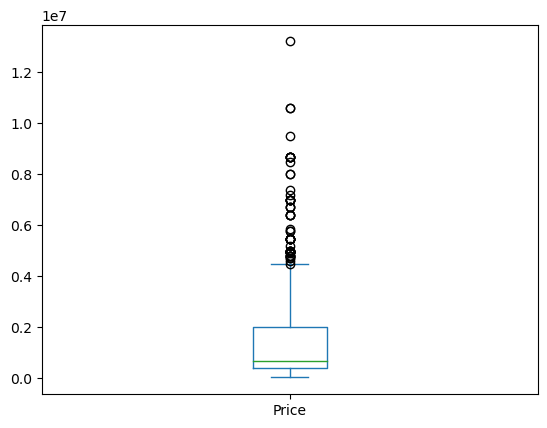

In [28]:
# Create a box plot for the 'Price' column in the DataFrame 'df'
#Detecting the outliers using box plot

df['Price'].plot(kind='box')
plt.show()

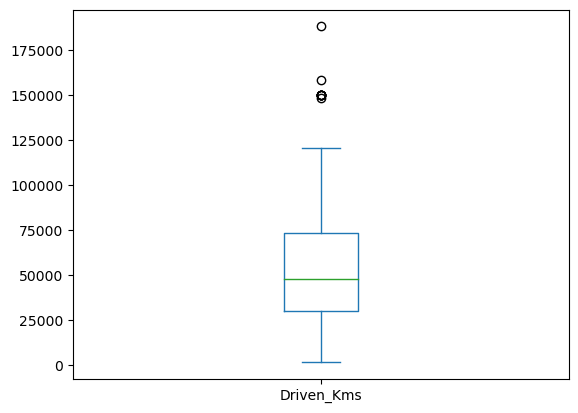

In [29]:
# Create a box plot for the 'Driven_Kms' column in the DataFrame 'df'
#Detecting the outliers using box plot

df['Driven_Kms'].plot(kind='box')
plt.show()

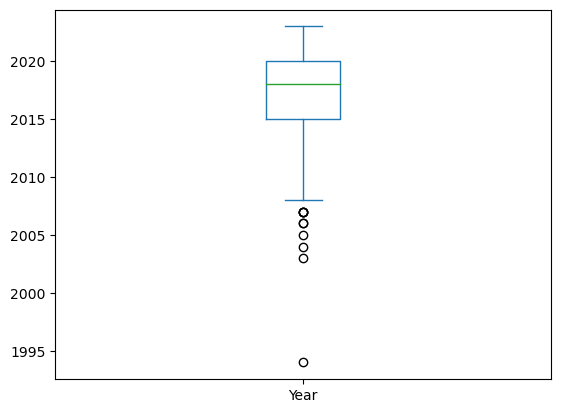

In [30]:
# Create a box plot for the 'Year' column in the DataFrame 'df'
#Detecting the outliers using box plot

df['Year'].plot(kind='box')
plt.show()

In [31]:
#Converting to numpy array to treat the outliers
numpy_array = np.array([df['Price']])
numpy_array

array([[ 4700000.,   360000.,  7200000.,   474000.,  4700000.,  1495000.,
          556000.,   680000.,  3350000.,   724000.,   340000.,   544000.,
         1300000.,  4800000.,   398000.,   545000.,  5200000.,  1560000.,
          120000.,  1080000.,   645000.,   645000.,   225000.,   316000.,
          625000.,  1749000.,   443000.,  1645000.,   749000.,  1084000.,
         1699000.,   750000.,  3600000.,  1875000.,   495000.,   791000.,
         1600000.,  5874000.,  1750000.,  3950000.,  2475000.,   460000.,
          850000.,   324000.,  2390000.,   745000.,   808000.,   399000.,
         3475000.,   358000.,  1895000.,   404000.,   310000.,   495000.,
          570000.,   950000.,  1050000.,   685000.,  1595000.,   572000.,
         8675000.,   387000.,  6700000.,  1177000.,  2000000.,  9500000.,
          540000.,  6400000.,  2775000.,   514000.,  6700000.,   374000.,
         4600000.,  4950000.,   669000.,  4800000.,   775000.,  3775000.,
          550000.,   525000.,  4500000

In [32]:
# Calculate the first quartile (Q1) of the given numpy array
Q1 = np.percentile(numpy_array, 25)
Q1

397000.0

In [33]:
# Calculate the third quartile (Q3) of the given numpy array
Q3 = np.percentile(numpy_array, 75)
Q3

2031250.0

In [34]:
# Calculate the Interquartile Range (IQR) using the third quartile (Q3) and first quartile (Q1)
IQR = Q3 - Q1
IQR

1634250.0

In [35]:
# Calculate the lower limit for identifying potential outliers using the Interquartile Range (IQR) method
lower_limit = Q1 - 1.5 * IQR
lower_limit

-2054375.0

In [36]:
# Calculate the upper limit for identifying potential outliers using the Interquartile Range (IQR) method
upper_limit = Q3 + 1.5 * IQR
upper_limit

4482625.0

In [37]:
# Calculate the outliers using lower limit and upper limit
Outliers=df[(df.Price<lower_limit)|(df.Price>upper_limit)]
Outliers

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,23000,4700000.0,"Mehdipatnam, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,9500,7200000.0,"Ammerpet, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,40000,4700000.0,"Mehdipatnam, Hyderabad"
13,Mercedes-Benz,Mercedes-Benz,GLC 200,2020,Petrol,Automatic,52000,4800000.0,"Ramgopalpet, Hyderabad"
16,Audi Q7,Audi,45 TDI Quattro Premium Plus,2017,Diesel,Automatic,60000,5200000.0,Hyderabad
...,...,...,...,...,...,...,...,...,...
386,BMW 3,BMW,Series Gran Limousine 330Li M Sport First Edition,2021,Petrol,Automatic,21000,4800000.0,"Chanakya Puri, New Delhi"
388,BMW X6,BMW,Xdrive40i M Sport,2020,Petrol,Automatic,5202,6975000.0,"Patparganj, New Delhi"
391,Land Rover,Land Rover,Discovery Sport TD4 SE 7S,2020,Diesel,Automatic,29647,5475000.0,"Patparganj, New Delhi"
394,BMW X4,BMW,M Sport X xDrive30d,2020,Diesel,Automatic,41000,4975000.0,"Patparganj, New Delhi"


In [38]:
# number of outliers based on 'Price' column in DataFrame 'df'
Outliers.count()

Name            61
Brand           61
Model           61
Year            61
Fuel_Type       61
Transmission    61
Driven_Kms      61
Price           61
City            61
dtype: int64

In [39]:
# Treating 'Price' column using 'clip()' method
df['Price'] = np.clip(df['Price'], lower_limit, upper_limit)
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,23000,4482625.0,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,86000,360000.0,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,9500,4482625.0,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,52039,474000.0,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,40000,4482625.0,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,80000,1250000.0,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,10000,700000.0,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,100000,120000.0,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,120000,275000.0,Thiruvananthapuram


In [40]:
#Checking whether outliers are removed or not
Outliers1=df[(df.Price<lower_limit)|(df.Price>upper_limit)]
Outliers1

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City


In [41]:
df['Price'].min()

40000.0

In [42]:
df['Price'].max()

4482625.0

In [43]:
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,23000,4482625.0,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,86000,360000.0,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,9500,4482625.0,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,52039,474000.0,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,40000,4482625.0,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,80000,1250000.0,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,10000,700000.0,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,100000,120000.0,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,120000,275000.0,Thiruvananthapuram


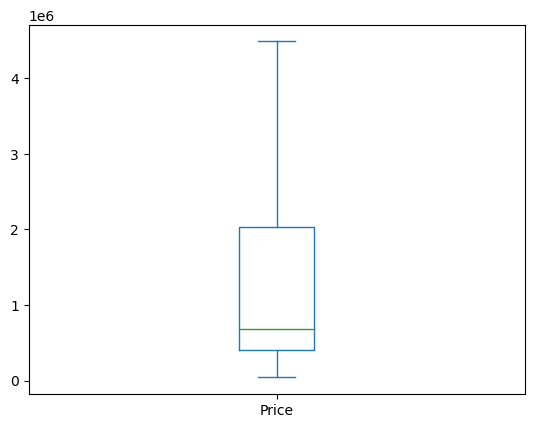

In [44]:
#Checking whether outliers are removed or not using box plot
df['Price'].plot(kind='box')
plt.show()

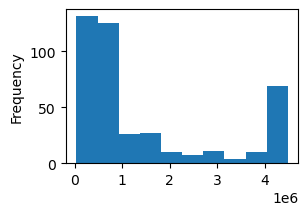

In [45]:
#Univariate Analysis - Numerical data using histogram in pyplot
plt.figure(figsize=(3,2))
df['Price'].plot(kind='hist')
plt.show()

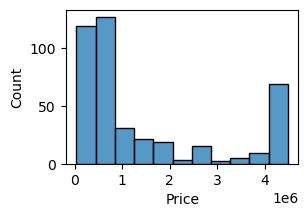

In [46]:
#Univariate Analysis - Numerical data using histogram in seaborn
plt.figure(figsize=(3,2))
sns.histplot(df['Price'])
plt.show()

Maruti           104
Hyundai           69
Mercedes-Benz     45
Honda             35
BMW               30
Audi              17
Mahindra          16
Renault           14
Toyota            12
Land Rover        10
Name: Brand, dtype: int64


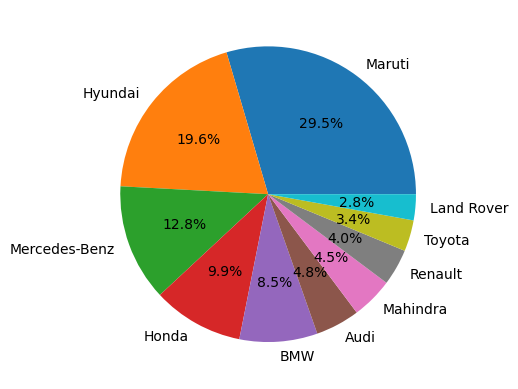

In [47]:
#Univariate Analysis - Categorical data
x = df['Brand'].value_counts().head(10)
print(x)
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

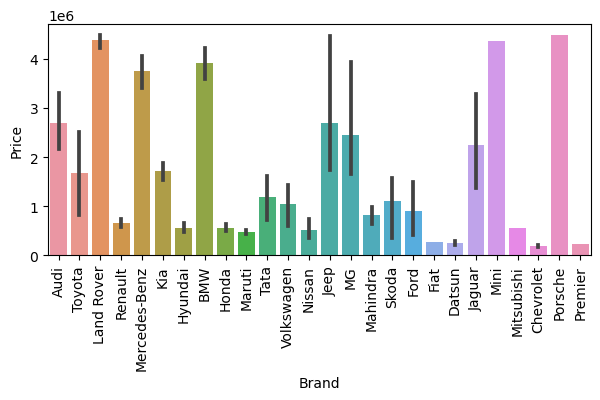

In [48]:
#Bivariate - Categorical v/s Numerical
plt.figure(figsize=(7,3)) 
sns.barplot(x=df['Brand'], y=df['Price']) 
plt.xticks(rotation = 90) 
plt.show()

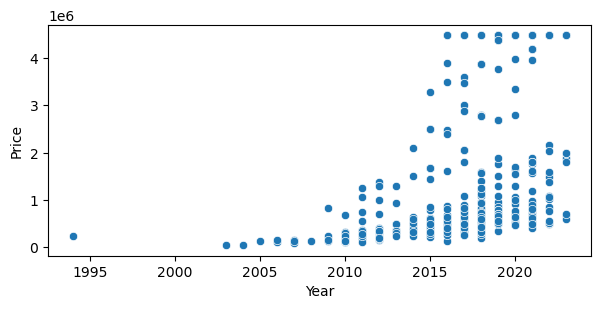

In [49]:
#Bivariate - Numerical vs Numerical
plt.figure(figsize=(7,3))
sns.scatterplot(x=df['Year'], y=df['Price'])
plt.show()

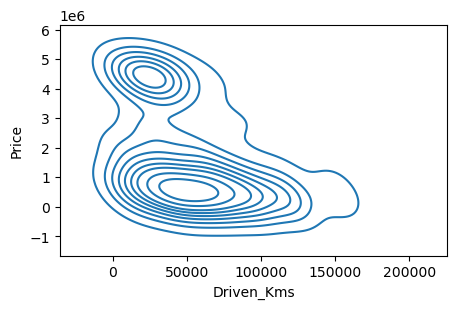

In [50]:
#Bivariate analysis using kde plot for numerical VS numerical data
plt.figure(figsize=(5,3))
sns.kdeplot(data=df, x='Driven_Kms', y='Price')
plt.show()

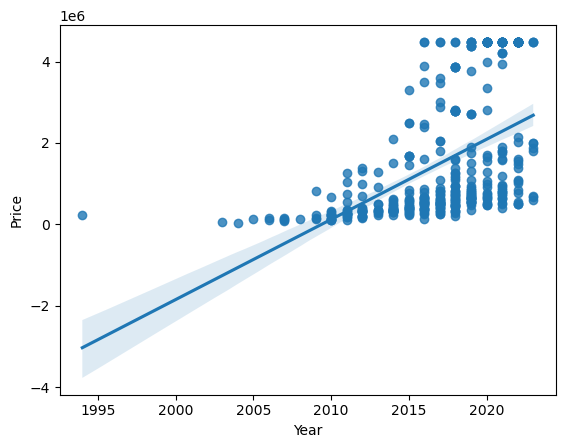

In [51]:
#Bivariate analysis using regression plot for numerical VS numerical data
x_col = 'Year'
y_col = 'Price'
sns.regplot(x=df[x_col], y=df[y_col])
plt.show()

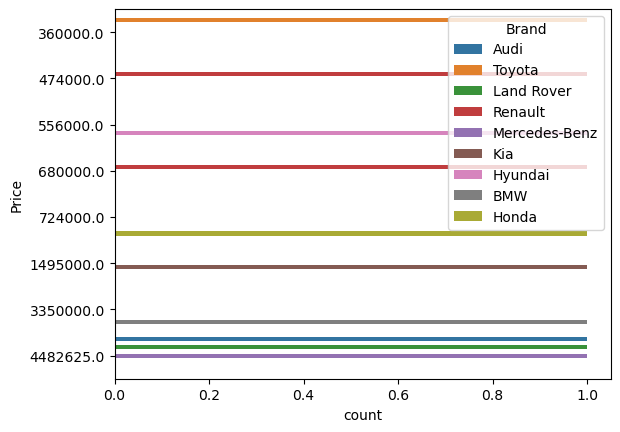

In [52]:
#Bivariate - Numerical vs Category
sns.countplot(x, y=df['Price'].head(10) , hue=df['Brand'].head(10))
plt.show()

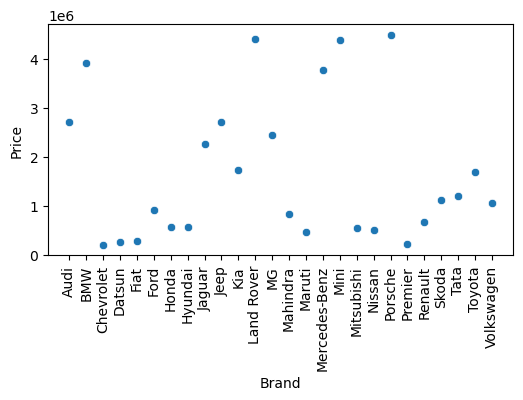

In [53]:
#Bivariate analysis using GroupBy - Categorical VS Numerical
var = df.groupby('Brand')['Price'].mean()
plt.figure(figsize=(6,3)) 
sns.scatterplot(var)
plt.xticks(rotation = 90) 
plt.show()

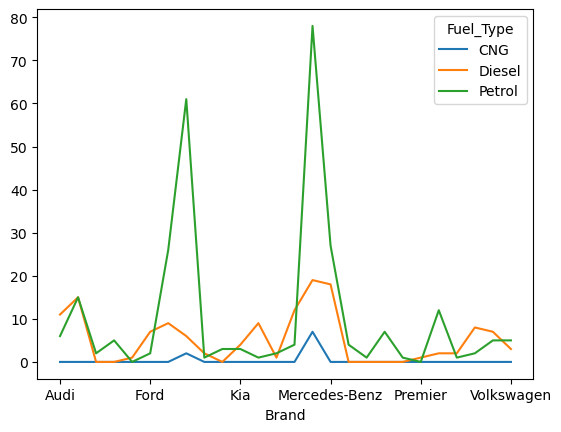

In [54]:
#Bivariate analysis using crosstab for categorical VS categorical data
pd.crosstab(df.Brand,df.Fuel_Type).plot()
plt.show()

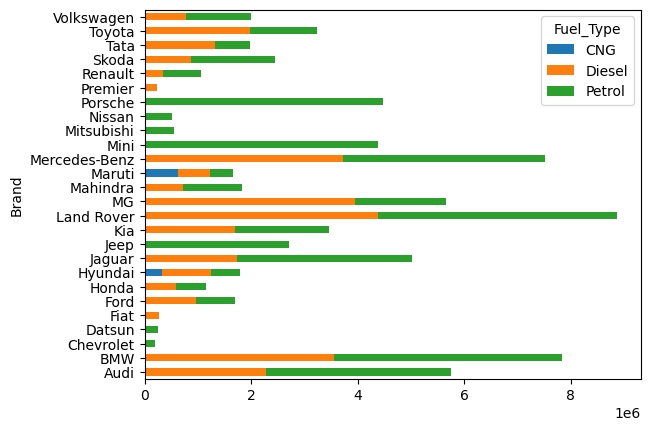

In [55]:
#Multivariate analysis using pivot table - Categorical VS Numerical
df.pivot_table('Price', index='Brand', columns='Fuel_Type',fill_value=0).head(50).plot(kind='barh', stacked=True)
plt.show()

C:\Users\227985\AppData\Local\Temp\ipykernel_21128\2469114618.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


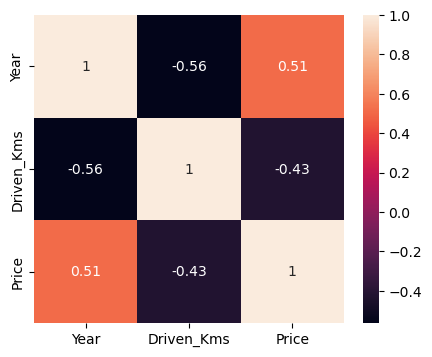

In [56]:
#Multivariate analysis using correlation for Numerical VS Numerical data
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [57]:
df

,Name,Brand,Model,Year,Fuel_Type,Transmission,Driven_Kms,Price,City
0,Audi Q5,Audi,35TDI,2018,Diesel,Automatic,23000,4482625.0,"Mehdipatnam, Hyderabad"
1,Toyota Etios,Toyota,Liva V,2013,Petrol,Manual,86000,360000.0,"Rahmath Nagar, Hyderabad"
2,Land Rover,Land Rover,Discovery Sport R-Dynamic SE Diesel,2022,Diesel,Automatic,9500,4482625.0,"Ammerpet, Hyderabad"
3,Renault KWID,Renault,1.0 RXT AMT Opt,2020,Petrol,Automatic,52039,474000.0,"Begumbazar, Hyderabad"
4,Mercedes-Benz,Mercedes-Benz,E-Class E350 CDI Avantgrade,2017,Diesel,Automatic,40000,4482625.0,"Mehdipatnam, Hyderabad"
...,...,...,...,...,...,...,...,...,...
415,BMW 5,BMW,Series 520d Sedan,2011,Diesel,Automatic,80000,1250000.0,Thiruvananthapuram
416,Maruti Wagon,Maruti,R VXI BSVI,2023,Petrol,Manual,10000,700000.0,Thiruvananthapuram
417,Maruti Alto,Maruti,800 LXi,2010,Petrol,Manual,100000,120000.0,Thiruvananthapuram
418,Maruti Swift,Maruti,VXI,2011,Petrol,Manual,120000,275000.0,Thiruvananthapuram


In [58]:
df.to_excel('carDekho.xlsx', index=False)